# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

www.imdb.com adalah sebuah website yang beisi review dan penilaian film-film dari seluruh dunia, disini akan dilakukan penarikan data atau scrapping untuk 50 film popular yang rilis pada tahun 2021 yang diambil dari link berikut https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31. Data-data yang akan ditarik ini berupa nama judul film, nilai rating IMDb setiap film, nilai dari metascore film, dan banyaknya vote yang didapatkan masing-masing film. Akhirnya data tersebut akan ditampilkan dalam chart yang akan menunjukan 7 film dengan peringkat teratas.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [26]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [27]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [28]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [29]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8179402/">
    <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5


Finding row length.

In [30]:
judul = table.find_all('h3', attrs={'class':'lister-item-header'}) 
judul[0].find('a').text

'Fate: The Winx Saga'

In [31]:
rating = table.find_all('div', attrs={'class':'ratings-bar'})
rating[0]

<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="6.9" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>6.9</strong>
</div>
<div class="inline-block ratings-user-rating">
<span class="userRatingValue" data-tconst="tt8179402" id="urv_tt8179402">
<span class="global-sprite rating-star no-rating"></span>
<span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
</span>
<div class="starBarWidget" id="sb_tt8179402">
<div class="rating rating-list" data-csrf-token="" data-ga-identifier="" data-starbar-class="rating-list" data-user="" id="tt8179402|imdb|6.9|6.9|adv_li_tt||advsearch|title" itemprop="aggregateRating" itemscope="" itemtype="http://schema.org/AggregateRating" title="Users rated this 6.9/10 (44,226 votes) - click stars to rate">
<meta content="6.9" itemprop="ratingValue"/>
<meta content="10" itemprop="bestRating"/>
<meta content="44226" itemprop="ratingCount"/>
<span class="rating-bg"> </

In [32]:
rating[0].find('meta', attrs={'itemprop':'ratingValue'})['content'] #imdb rating

'6.9'

In [33]:
rating[0].find('meta', attrs={'itemprop':'ratingCount'})['content'] #vote

'44226'

In [34]:
rating[4].find_all('span', attrs={'class':'metascore favorable'})[0].text.strip() #Metascore

'65'

In [35]:
row = table.find_all('h3', attrs={'class':'lister-item-header'})
row_length = len(row)
row_length

50

Do the scrapping process here (please change this markdown with your explanation)

In [36]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    Title = judul[i].find('a').text
    IMDB_Rating = rating[i].find('meta', attrs={'itemprop':'ratingValue'})['content']
    Vote = rating[i].find('meta', attrs={'itemprop':'ratingCount'})['content']
    MetaScore = rating[i].find_all('span', attrs={'class':'metascore favorable'})
    if len(MetaScore) > 0:
        MetaScore = rating[i].find_all('span', attrs={'class':'metascore favorable'})[0].text.strip()
    else:
        MetaScore = "0"

        
    temp.append((Title,IMDB_Rating,MetaScore,Vote))
temp

[('Fate: The Winx Saga', '6.9', '0', '44226'),
 ('The White Lotus', '7.6', '0', '67418'),
 ('Only Murders in the Building', '8.1', '0', '96067'),
 ('Abbott Elementary', '8.2', '0', '13572'),
 ('The Black Phone', '7', '65', '112156'),
 ('Resident Alien', '8.1', '0', '39117'),
 ('American Horror Stories', '6.2', '0', '20714'),
 ('1883', '8.8', '0', '63076'),
 ('Reservation Dogs', '8.1', '0', '14530'),
 ('Spider-Man: No Way Home', '8.3', '71', '729689'),
 ('La scuola cattolica', '5.7', '0', '1761'),
 ('Dune: Part One', '8', '74', '613896'),
 ('Licorice Pizza', '7.2', '90', '105171'),
 ('Forsvinningen på Lørenskog', '6.1', '0', '1002'),
 ('Dopesick', '8.6', '0', '54399'),
 ("NCIS: Hawai'i", '6.3', '0', '5518'),
 ('Mona Lisa and the Blood Moon', '6.2', '68', '943'),
 ('The Little Things', '6.3', '0', '99502'),
 ('Bloodlands', '6.6', '0', '5063'),
 ('Arcane: League of Legends', '9', '0', '197585'),
 ('Yellowjackets', '7.9', '0', '44796'),
 ('The Wheel of Time', '7.1', '0', '102318'),
 ('Sing

## Creating data frame & Data wrangling

Put the array into dataframe

In [37]:
import pandas as pd

Data_Film = pd.DataFrame(temp, columns = ('Title','IMDB_Rating','MetaScore','Vote'))
Data_Film.head()

,Title,IMDB_Rating,MetaScore,Vote
0,Fate: The Winx Saga,6.9,0,44226
1,The White Lotus,7.6,0,67418
2,Only Murders in the Building,8.1,0,96067
3,Abbott Elementary,8.2,0,13572
4,The Black Phone,7,65,112156


In [38]:
Data_Film.dtypes

Title          object
IMDB_Rating    object
MetaScore      object
Vote           object
dtype: object

In [39]:
Data_Film[['IMDB_Rating','MetaScore']] = Data_Film[['IMDB_Rating','MetaScore']].astype('float64')
Data_Film['Vote'] = Data_Film['Vote'].astype('int64')
Data_Film.dtypes

Title           object
IMDB_Rating    float64
MetaScore      float64
Vote             int64
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [47]:
# Berdasarkan Rating
Data_Rating= Data_Film.sort_values(by= 'IMDB_Rating', ascending=False).set_index('Title')
Data_Rating[['IMDB_Rating']].head(7)

,IMDB_Rating
Title,
Arcane: League of Legends,9.0
1883,8.8
Dopesick,8.6
Mare of Easttown,8.4
Spider-Man: No Way Home,8.3
Abbott Elementary,8.2
Loki,8.2


In [41]:
#Berdasarkan Score
Data_Score= Data_Film.sort_values(by= 'MetaScore', ascending=False).set_index('Title')
Data_Score[['MetaScore']].head(7)

,MetaScore
Title,
Licorice Pizza,90.0
Spencer,76.0
Pleasure,75.0
Dune: Part One,74.0
Spider-Man: No Way Home,71.0
Gekijouban Jujutsu Kaisen 0,71.0
No Time to Die,68.0


In [42]:
#Berdasarkan Vote
Data_Vote= Data_Film.sort_values(by= 'Vote', ascending=False).set_index('Title')
Data_Vote[['Vote']].head(7)

,Vote
Title,
Spider-Man: No Way Home,729689
Dune: Part One,613896
Don't Look Up,526242
Ojing-eo geim,435949
No Time to Die,390009
Free Guy,360987
Eternals,333245


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:title={'center':'7 FILM TERATAS BERDASARKAN IMDB RATING'}, ylabel='Title'>

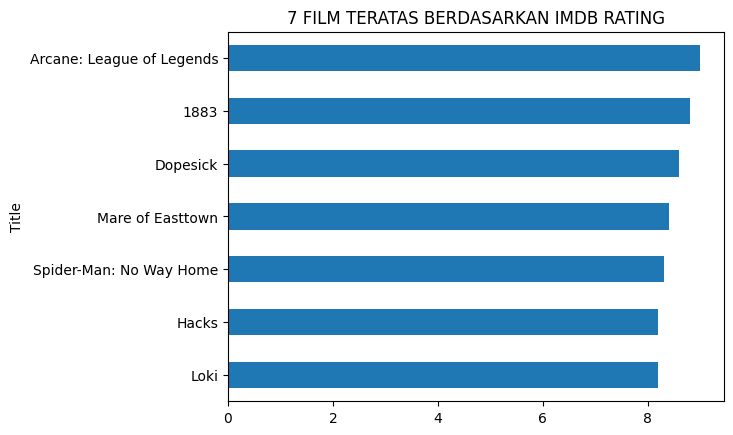

In [43]:
# Berdasarkan Rating
D_Rating = Data_Film.sort_values(by= 'IMDB_Rating', ascending=True).set_index('Title')
D_Rating['IMDB_Rating'].tail(7).plot.barh(title = '7 FILM TERATAS BERDASARKAN IMDB RATING')

<AxesSubplot:title={'center':'7 FILM TERATAS BERDASARKAN METASCORE'}, ylabel='Title'>

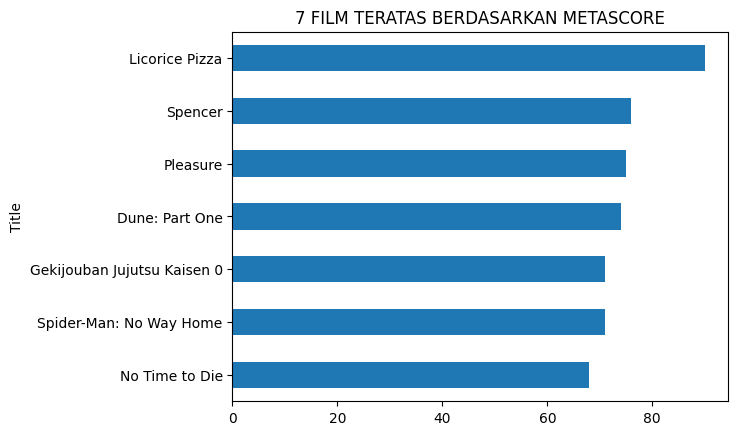

In [44]:
# Berdasarkan Score
D_Score= Data_Film.sort_values(by= 'MetaScore', ascending=True).set_index('Title')
D_Score['MetaScore'].tail(7).plot.barh(title = '7 FILM TERATAS BERDASARKAN METASCORE')

<AxesSubplot:title={'center':'7 FILM TERATAS BERDASARKAN BANYAK VOTE'}, ylabel='Title'>

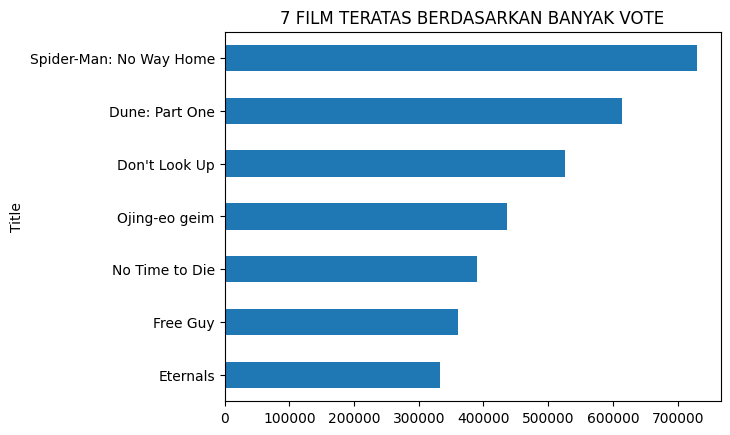

In [45]:
# Berdasarkan Vote
D_Vote= Data_Film.sort_values(by= 'Vote', ascending=True).set_index('Title')
D_Vote['Vote'].tail(7).plot.barh(title = '7 FILM TERATAS BERDASARKAN BANYAK VOTE')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion


<AxesSubplot:title={'center':'7 FILM TERATAS BERDASARKAN IMDB RATING'}, ylabel='Title'>

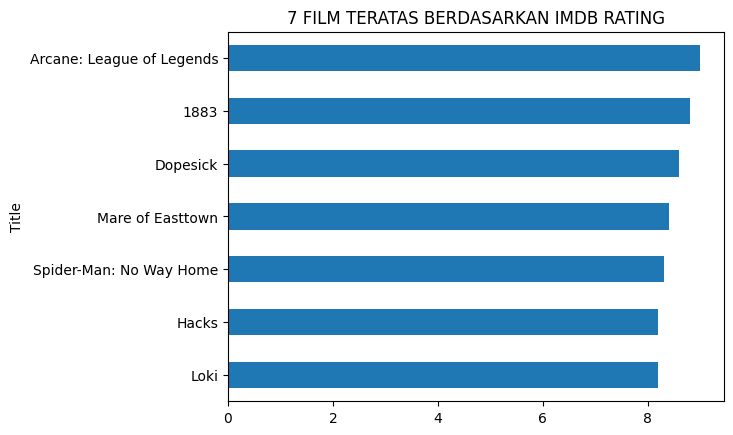

In [48]:
D_Rating['IMDB_Rating'].tail(7).plot.barh(title = '7 FILM TERATAS BERDASARKAN IMDB RATING')

<AxesSubplot:title={'center':'7 FILM TERATAS BERDASARKAN METASCORE'}, ylabel='Title'>

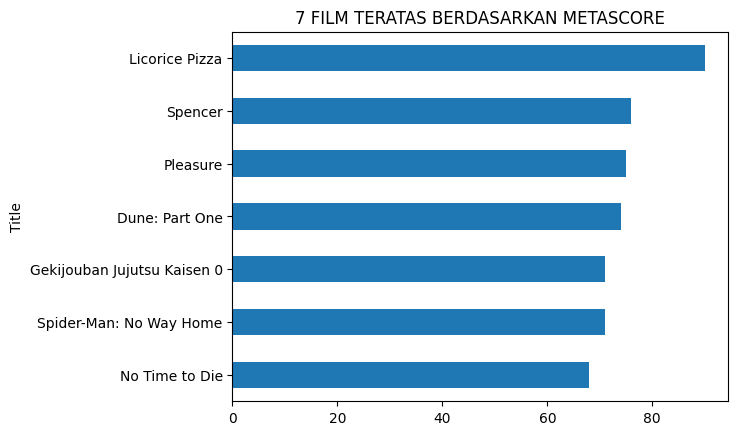

In [49]:
D_Score['MetaScore'].tail(7).plot.barh(title = '7 FILM TERATAS BERDASARKAN METASCORE')

<AxesSubplot:title={'center':'7 FILM TERATAS BERDASARKAN BANYAK VOTE'}, ylabel='Title'>

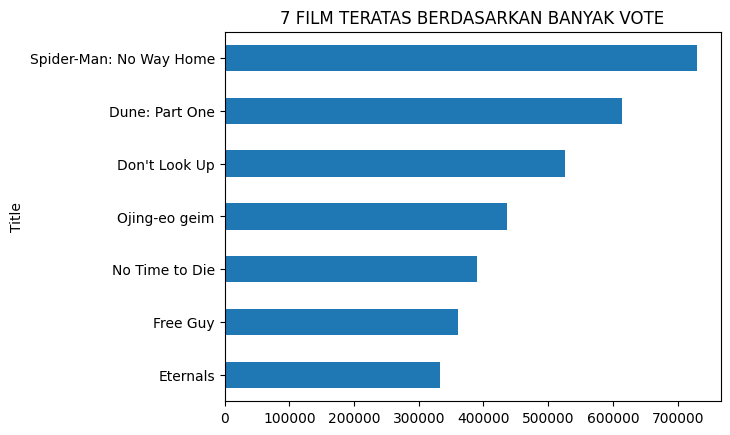

In [50]:
D_Vote['Vote'].tail(7).plot.barh(title = '7 FILM TERATAS BERDASARKAN BANYAK VOTE')

Berdasarkan ketiga chart yang telah ditampilkan dapat ditarik kesimpulan bahwa setiap tipe (IMDB Ratin, MetaScore, dan Vote) memiliki hasil yang berbeda dan tidak semua film memiliki MetaScore. Besaran data yang dimiliki oleh setiap tipe ini juga berbeda dimana Data pada IMDB Rating memiliki nilai satuan, pada MetaScore memiliki nilai puluhan, dan pada vote sangat berbeda jauh yaitu memiliki nilai ratusan ribu. Hal-hal ini menyebabkan data ketiga tipe tersebut tidak bisa ditampilkan dalam satu plot. Dari keseluruhan film **Spider-Man: No Way Home** selain sebagai film dengan Vote tertinggi tetapi juga selalu muncul pada setiap tipe, dapat disimpulkan bahwa film **Spider-Man: No Way Home** adalah film yang sangat diminati.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.